In [1]:
import shnitsel as st
import shnitsel.xarray

In [6]:
cd /tmp

/tmp


In [7]:
frames = st.read('A03_butene_0p50fs_dynamic.nc')

INFO: Identified the path `A03_butene_0p50fs_dynamic.nc` to be of format `shnitsel`.
INFO: State names already assigned


In [9]:
frames

<xarray.Dataset> Size: 88MB
Dimensions:      (state: 3, frame: 36579, statecomb: 3, atom: 12, direction: 3,
                  trajid_: 156)
Coordinates: (12/13)
  * state        (state) int64 24B 1 2 3
  * atom         (atom) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
  * direction    (direction) <U1 12B 'x' 'y' 'z'
    atNames      (atom) <U1 48B ...
  * trajid_      (trajid_) int32 624B 2 3 6 11 13 16 ... 307 310 311 313 314 316
    state_types  (state) float64 24B ...
    ...           ...
  * statecomb    (statecomb) object 24B MultiIndex
  * from         (statecomb) int64 24B 1 1 2
  * to           (statecomb) int64 24B 2 3 3
  * frame        (frame) object 293kB MultiIndex
  * trajid       (frame) int64 293kB 2 2 2 2 2 2 2 ... 316 316 316 316 316 316
  * time         (frame) float64 293kB 0.0 0.5 1.0 1.5 ... 76.5 77.0 77.5 78.0
Data variables:
    energy       (state, frame) float64 878kB ...
    nacs         (statecomb, atom, direction, frame) float64 32MB ...
    atXYZ        (atom, direction, frame) float64 11MB ...
    sdiag        (frame) int64 293kB ...
    phases       (state, frame) float64 878kB ...
    e_kin        (frame) float64 293kB ...
    forces       (state, atom, direction, frame) float64 32MB ...
    dip_perm     (state, direction, frame) float64 3MB ...
    dip_trans    (statecomb, direction, frame) float64 3MB ...
    astate       (frame) int64 293kB ...
    completed    (frame, trajid_) int8 6MB ...
Attributes:
    delta_t:                0.5
    num_singlets:           3
    num_doublets:           0
    num_triplets:           0
    trajectory_input_path:  A03_butene_0p50fs_dynamic.nc
    charge:                 0
    __original_dataset:     <xarray.Dataset> Size: 88MB\nDimensions:      (st...

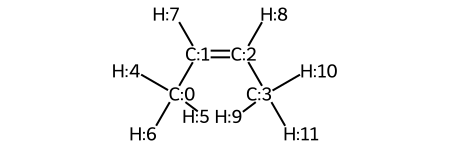

In [58]:
mol = frames.st.default_mol()  # Check whether default_mol returns a copy of mol attr
mol

In [59]:
# Get proportion
dih_end = (
    frames.atXYZ
    .st.dihedral(0, 1, 2, 3, deg=True)
    .groupby('trajid').last()
)
proportion = (dih_end > 100).sum() / dih_end.sizes['trajid']
proportion = proportion.item()
proportion

0.3269230769230769

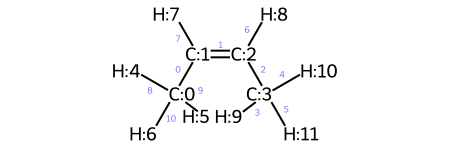

In [60]:
import rdkit.Chem as rc
for bond in mol.GetBonds():
    bond.SetProp('bondNote', str(bond.GetIdx()))
mol

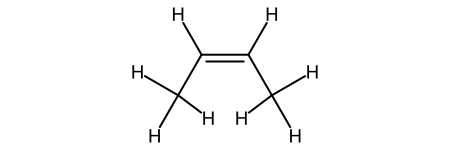

In [62]:
mol = frames.st.default_mol()
for atom in mol.GetAtoms():
    atom.SetAtomMapNum(0)
mol

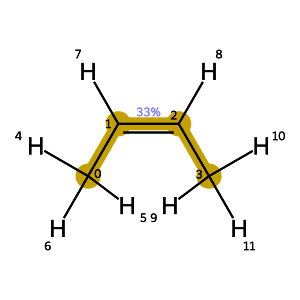

In [63]:
mol.GetBondWithIdx(1).SetProp('bondNote', f"{proportion * 100:.0f}%")
_, img = st.geo.geomatch.flag_dihedrals(mol, 'CC=CC', draw=True)
img